# EDA IS ALL YOU NEED

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

def load_dataset(plant):
    train = pd.read_csv(f'../data/train_{plant}.csv', parse_dates=["时间"]).drop_duplicates().reset_index(drop=True)
    test = pd.read_csv(f'../data/test_{plant}.csv', parse_dates=["时间"])
    train.columns = ['time', 'irr', 'ws', 'wd', 'temp', 'pr', 'hm', 'mirr', 'power']
    test.columns = ['id', 'time', 'irr', 'ws', 'wd', 'temp', 'pr', 'hm']
    data = pd.concat([train, test])
    return data

PLANT = 1
pl = load_dataset(1)
pl.reset_index(drop=True, inplace=True)
train = pl.id.isnull()
test  = pl.id.notnull()

print(f'train set from {pl[train]["time"].min().date()} to {pl[train]["time"].max().date()}')
print(f'test  set from {pl[test]["time"].min().date()} to {pl[test]["time"].max().date()}')
M5toM8 = pl.time.dt.month.isin([5, 6, 7, 8])

train set from 2016-04-01 to 2018-04-30
test  set from 2018-04-30 to 2018-08-31


## Power

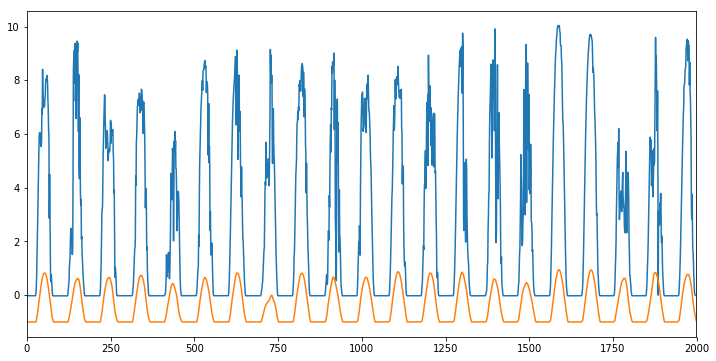

In [7]:
pl.iloc[: 2000]['power'].plot(figsize=(12, 6))
pl.iloc[: 2000]['irr'].plot(figsize=(12, 6))

In [47]:
max_power_time = pl[pl.id.isnull()].groupby(pl[pl.id.isnull()].time.dt.date).apply(lambda x: x.iloc[np.argmax(x.power.values), -3]).dropna()

In [53]:
max_power_time.dt.time.value_counts()

13:15:00    101
13:00:00     75
13:30:00     57
12:45:00     55
13:45:00     52
12:00:00     40
12:15:00     34
12:30:00     33
14:00:00     28
14:30:00     23
11:45:00     23
14:45:00     22
11:30:00     22
15:00:00     20
14:15:00     16
11:00:00     12
15:15:00     12
11:15:00     12
15:30:00     10
15:45:00      9
10:45:00      7
10:30:00      6
16:00:00      5
10:15:00      5
10:00:00      5
16:45:00      4
16:30:00      3
09:15:00      2
16:15:00      1
09:45:00      1
17:45:00      1
09:00:00      1
09:30:00      1
dtype: int64

In [84]:
max_power_time[max_power_time.dt.hour >15]

time
2016-07-11   2016-07-11 16:30:00
2016-07-16   2016-07-16 16:45:00
2016-07-18   2016-07-18 17:45:00
2016-07-21   2016-07-21 16:00:00
2016-07-25   2016-07-25 16:00:00
2016-08-09   2016-08-09 16:00:00
2016-08-23   2016-08-23 16:15:00
2016-09-11   2016-09-11 16:00:00
2016-09-15   2016-09-15 16:45:00
2016-10-04   2016-10-04 16:30:00
2016-10-07   2016-10-07 16:00:00
2016-10-14   2016-10-14 16:30:00
2017-07-27   2017-07-27 16:45:00
2017-08-01   2017-08-01 16:45:00
dtype: datetime64[ns]

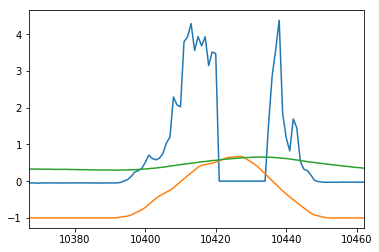

In [81]:
pl[(pl.time>='2016-07-18') & (pl.time<'2016-07-19')]['power'].plot()
pl[(pl.time>='2016-07-18') & (pl.time<'2016-07-19')]['irr'].plot()
pl[(pl.time>='2016-07-18') & (pl.time<'2016-07-19')]['temp'].plot()

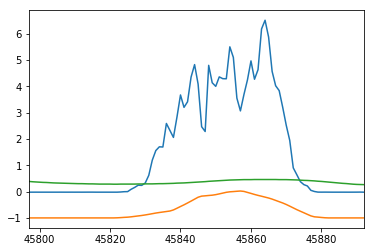

In [85]:
s1 = '2017-08-01'
s2 = s1[:-1] + str(int(s1[-1])+1)
pl[(pl.time>=s1) & (pl.time<s2)]['power'].plot()
pl[(pl.time>=s1) & (pl.time<s2)]['irr'].plot()
pl[(pl.time>=s1) & (pl.time<s2)]['temp'].plot()

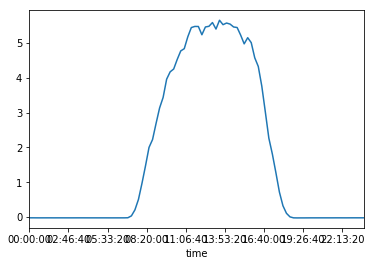

In [83]:
temp = pl[(pl.time>='2016-10-01') & (pl.time<'2016-10-31')]
temp.groupby(temp.time.dt.time)['power'].mean().plot()

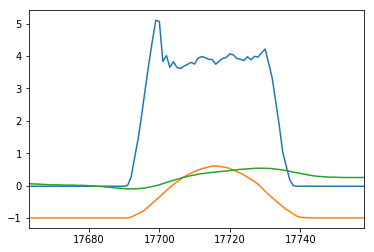

In [79]:
pl[(pl.time>='2016-10-02') & (pl.time<'2016-10-03')]['power'].plot()
pl[(pl.time>='2016-10-02') & (pl.time<'2016-10-03')]['irr'].plot()
pl[(pl.time>='2016-10-02') & (pl.time<'2016-10-03')]['temp'].plot()

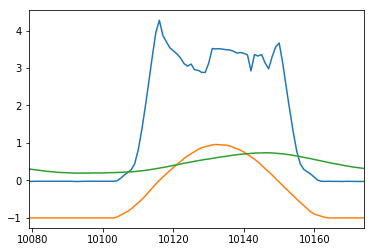

In [78]:
pl[(pl.time>='20160715') & (pl.time<'20160716')]['power'].plot()
pl[(pl.time>='20160715') & (pl.time<'20160716')]['irr'].plot()
pl[(pl.time>='20160715') & (pl.time<'20160716')]['temp'].plot()

In [90]:
pl['power'].diff(2).dropna().describe()

count    66856.000000
mean        -0.000001
std          0.918897
min         -8.376337
25%         -0.027083
50%          0.000000
75%          0.055000
max          8.404663
Name: power, dtype: float64

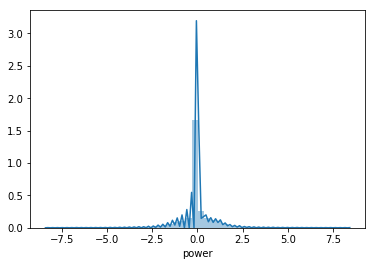

In [91]:
sns.distplot(pl['power'].diff(2).dropna())

In [104]:
np.percentile(pl['power'].diff(2).dropna().values,5)

-1.4646599999999999

In [112]:
pl['power_diff2'] = pl['power'].diff(2)
pl['power_diff1'] = pl['power'].diff(1)

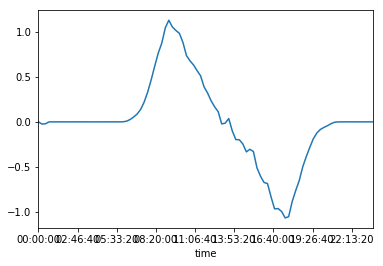

In [111]:
pl[pl.id.isnull()].groupby(pl[pl.id.isnull()].time.dt.time)['power_diff2'].mean().plot()

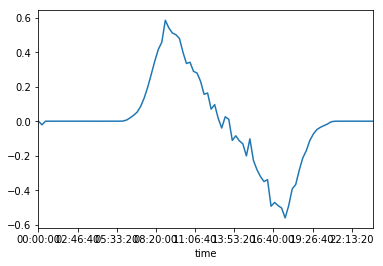

In [113]:
pl[pl.id.isnull()].groupby(pl[pl.id.isnull()].time.dt.time)['power_diff1'].mean().plot()

In [116]:
import pyod

## Date Feature

In [36]:
pl

,hm,id,irr,mirr,power,pr,temp,time,wd,ws
0,-0.157895,NaN,-1.000000,0.00000,-0.019333,-0.030303,-0.090909,2016-04-01 00:15:00.000,251,-0.707547
1,-0.136842,NaN,-1.000000,0.00000,-0.021000,-0.030303,-0.107071,2016-04-01 00:30:00.000,250,-0.716981
2,-0.094737,NaN,-1.000000,0.00000,-0.022000,0.030303,-0.123232,2016-04-01 00:45:00.000,248,-0.726415
3,-0.073684,NaN,-1.000000,0.00000,-0.022000,0.030303,-0.135354,2016-04-01 01:00:00.000,244,-0.735849
4,-0.052632,NaN,-1.000000,0.00000,-0.022000,0.030303,-0.147475,2016-04-01 01:15:00.000,241,-0.754717
5,-0.010526,NaN,-1.000000,0.00000,-0.020667,0.030303,-0.163636,2016-04-01 01:30:00.000,234,-0.754717
6,0.010526,NaN,-1.000000,0.00000,-0.020667,0.030303,-0.179798,2016-04-01 01:45:00.000,231,-0.754717
7,0.031579,NaN,-1.000000,0.00000,-0.020667,0.030303,-0.191919,2016-04-01 02:00:00.000,227,-0.764151
8,0.073684,NaN,-1.000000,0.00000,-0.022000,0.030303,-0.204040,2016-04-01 02:15:00.000,220,-0.764151
9,0.094737,NaN,-1.000000,0.00000,-0.022000,0.030303,-0.216162,2016-04-01 02:30:00.000,215,-0.773585


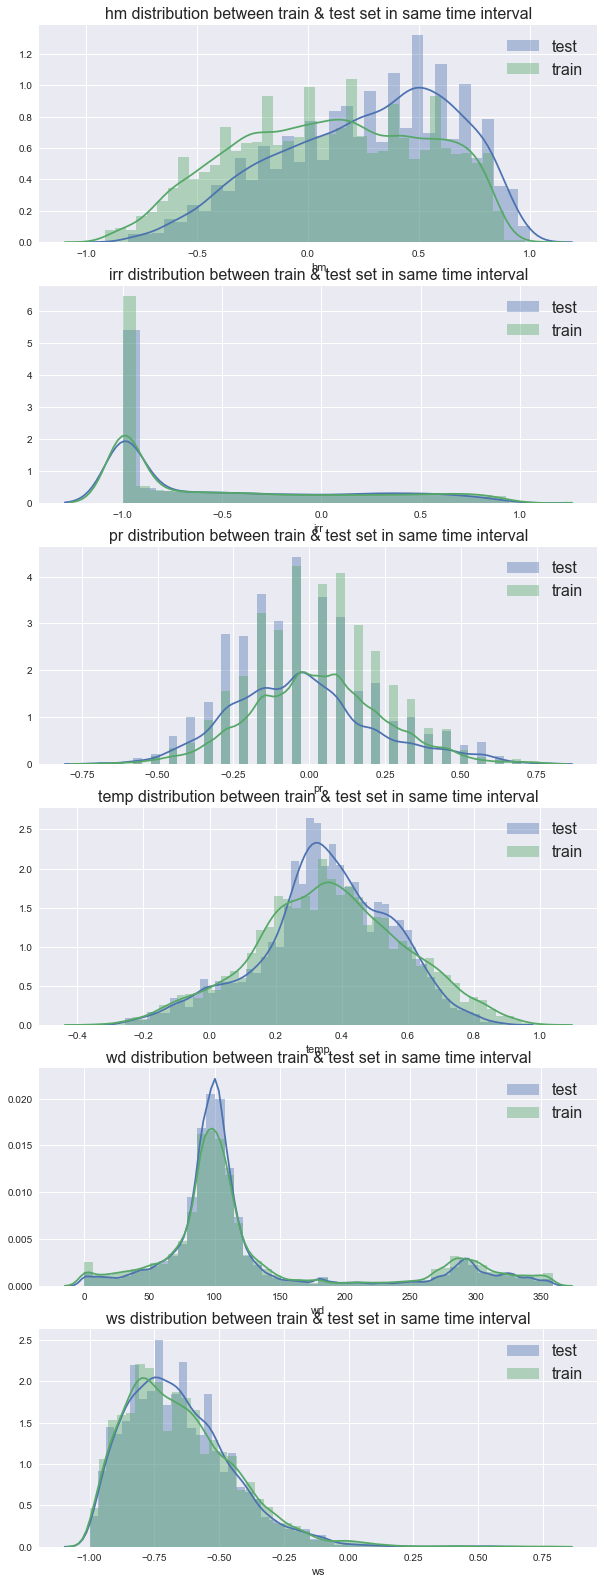

In [34]:
look_col = ['hm', 'irr', 'pr', 'temp', 'wd', 'ws']
f, axes = plt.subplots(len(look_col), figsize=(10, 28))
for i, col in enumerate(look_col):
    sns.distplot(pl[test & M5toM8][col], ax=axes[i], label="test")
    sns.distplot(pl[train & M5toM8][col], ax=axes[i], label="train")
    axes[i].legend(fontsize=16)
    axes[i].set_title(f'{col} distribution between train & test set in same time interval', size=16)